In [1]:
from scipy.signal import butter, lfilter, freqz, freqs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")

data = pd.read_csv('wsp_test.csv')

Text(0, 0.5, 'Wind velocity [m/s]')

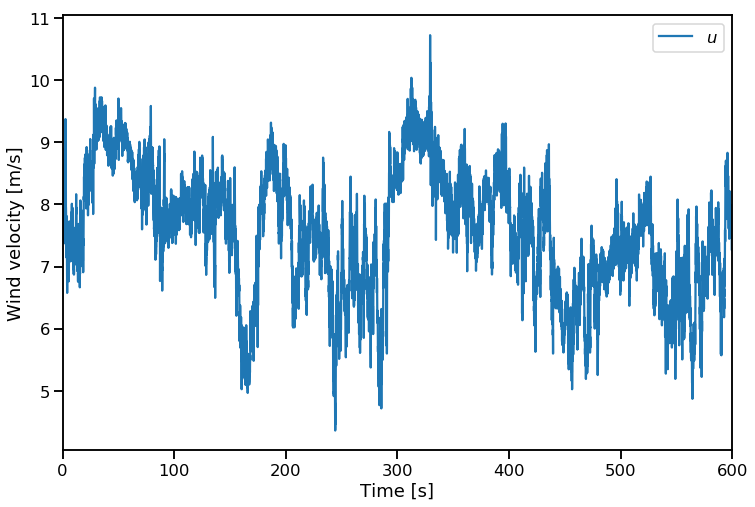

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data.time, data.u100, label=r'$u$')
plt.legend()
plt.xlim([0,600])
plt.xlabel('Time [s]')
plt.ylabel('Wind velocity [m/s]')

In [3]:
fs = 18  # The sampling frequency
u_fft = np.fft.rfft(data.u100)
freq = np.linspace(0,fs/2,len(u_fft))

Text(0, 0.5, 'Wind velocity [m/s]')

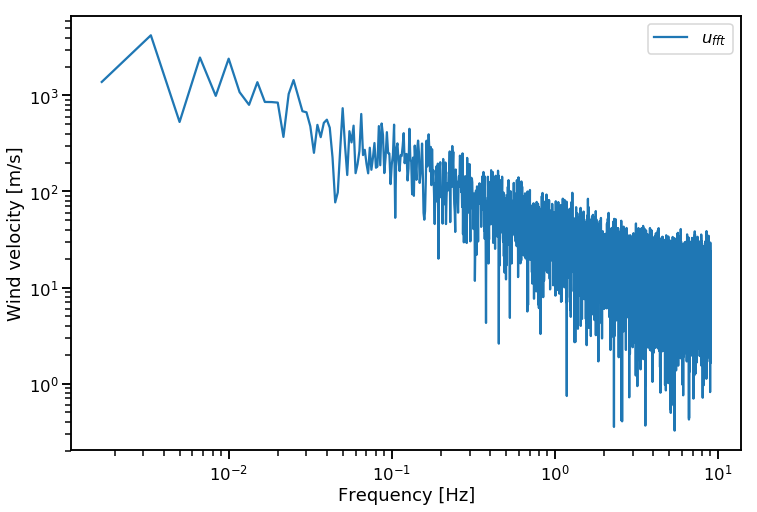

In [4]:
plt.figure(figsize=(12,8))
plt.loglog(freq[1:], np.abs(u_fft[1:]), label=r'$u_{fft}$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Wind velocity magnitude [m/s]')

In [19]:
D_r = 100  # Rotor diameter
f_cut = data.u100.mean()/(2*D_r)

In [17]:
b, a = butter(2, f_cut, btype='low', analog=True)
w, h = freqs(b,a,worN=freq)

b1, a1 = butter(4, f_cut, btype='low', analog=True)
w1, h1 = freqs(b1,a1,worN=freq)

b2, a2 = butter(2, f_cut*10, btype='low', analog=True)
w2, h2 = freqs(b2,a2,worN=freq)

Text(0, 0.5, 'Frequency response')

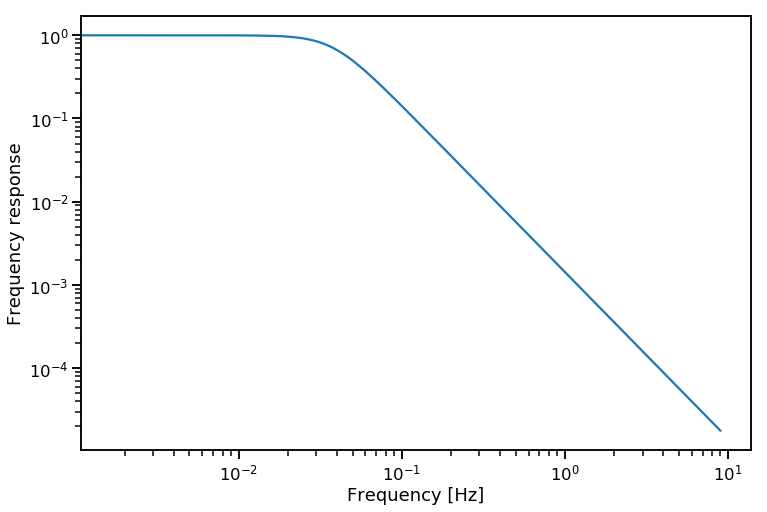

In [20]:
plt.figure(figsize=(12,8))
plt.loglog(freq, np.abs(h))
#plt.loglog(freq, np.abs(h1))
#plt.loglog(freq, np.abs(h2))
#plt.axvline(f_cut, color='green')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency response')

Multiply the frequency response of the filter with the wind speed signal in frequency domain


In [8]:
u_fft_filt = u_fft*h

Make an inverse Fourier transform of u_ft_filt to get the low-pass filtered signal

In [9]:
u_filt = np.fft.irfft(u_fft_filt)

Text(0, 0.5, 'Wind velocity [m/s]')

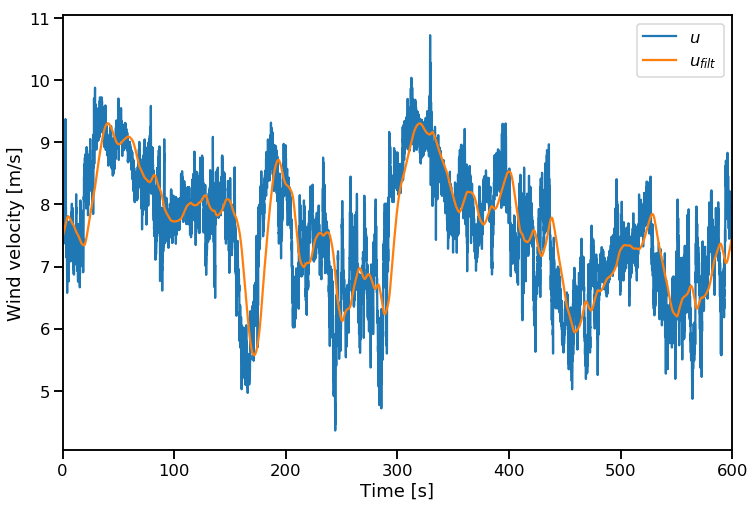

In [10]:
plt.figure(figsize=(12,8))
plt.plot(data.time, data.u100, label=r'$u$')
plt.plot(data.time, u_filt, label=r'$u_{filt}$')
plt.legend()
plt.xlim([0,600])
plt.xlabel('Time [s]')
plt.ylabel('Wind velocity [m/s]')